In [19]:
%load_ext autoreload
%autoreload 2

In [20]:
import time
from pathlib import Path
import pandas as pd
from PIL import Image
from weavingtools.annotation_tools import *
from weavingtools.annotation_tools import plot_by_record, open_image
from weavingtools.linkage_tools import *
from weavingtools.embedding_tools import *
import scipy.spatial as sp
import ipyannotations.generic
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
sns.set()

In [21]:
collection_db = load_db("hw-16-08",'heritage-weaver-base','google/siglip-base-patch16-224')
collection_db_ft = load_db("hw-16-08",'heritage-weaver-ft','Kaspar/siglip-heritage-weaver-text-last')
collection_db_ft_best = load_db("hw-16-08",'heritage-weaver-ft-best','Kaspar/siglip-heritage-weaver-text-best')
collection_df = pd.read_csv('data/heritage_weaver_data.csv')


In [22]:
collection_db.count(),collection_db_ft.count(),collection_db_ft_best.count()

(107222, 107222, 107222)

In [23]:
query = 'a telephone' #'a telegraph' #'a telephone' #'a laser table' #'an electrophone'
experiment = '1'

In [24]:
# retrieve records
if experiment == '1':
    filters = {'modality':'image'}
elif experiment == '2':
    filters = {'modality':'text'}
elif experiment == '3':
    filters = {}



In [25]:
#collection_db.query(query_texts=['an image of a coherer'],where=filters, n_results=3)

(15, 8)


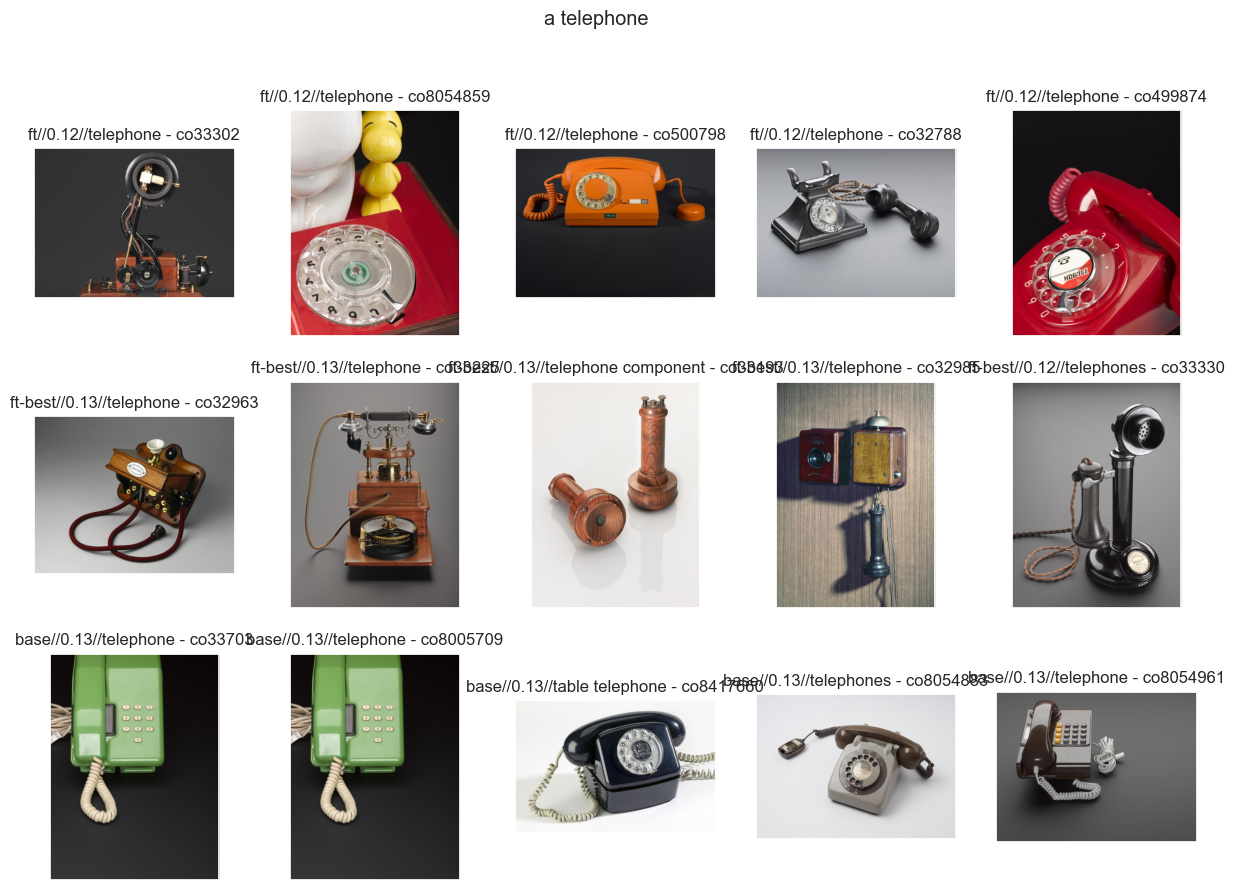

In [32]:
collection_dict = {'base': collection_db, 'ft': collection_db_ft,'ft-best': collection_db_ft_best}
top_n = 5
start_from = 5
source = 'img_path'
query = 'a telephone'


result_df, fig = compare_models(query, filters, collection_dict, source,top_n,start_from)

# Write Data for Experiment

(12, 8)
(12, 8)
(12, 8)
(12, 8)
(12, 8)
(12, 8)
(12, 8)
(12, 8)


KeyboardInterrupt: 

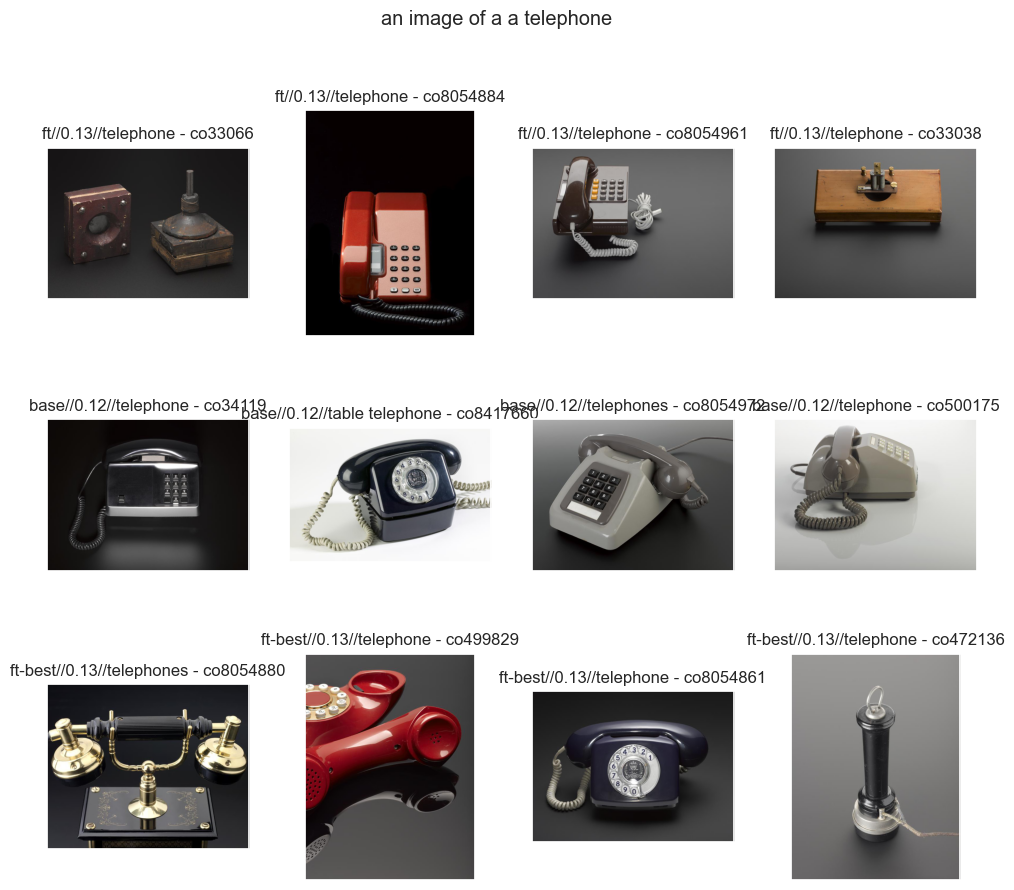

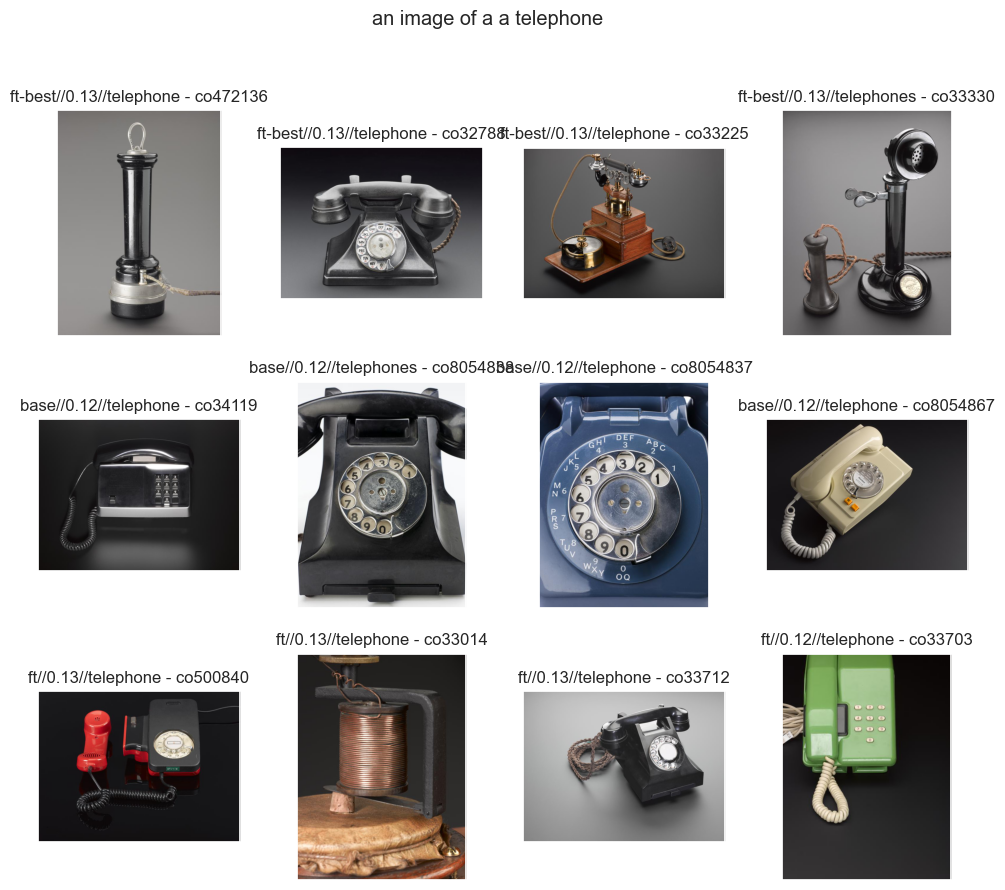

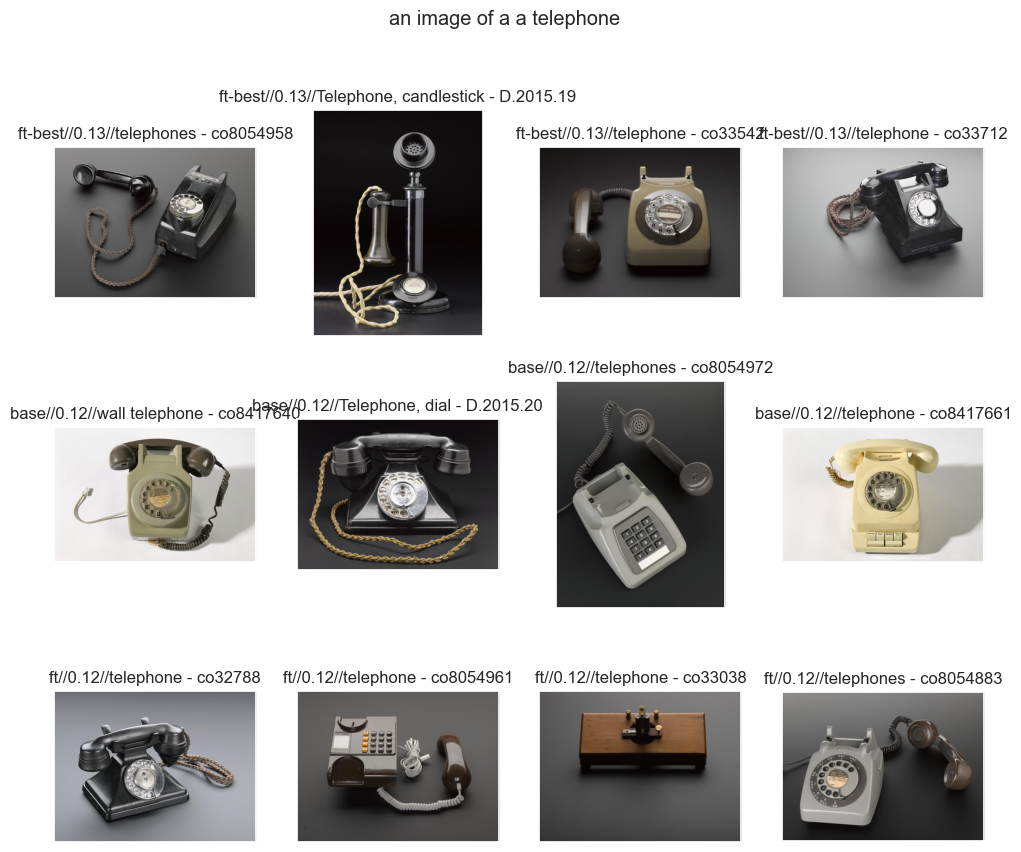

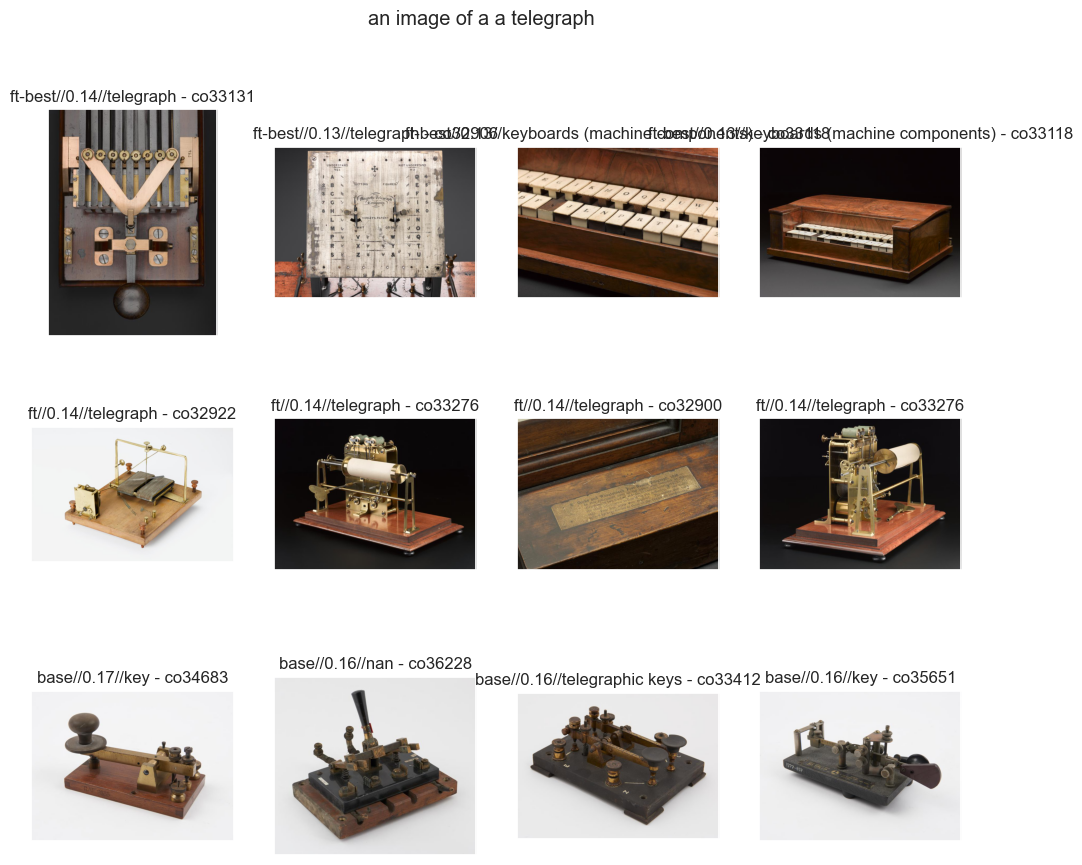

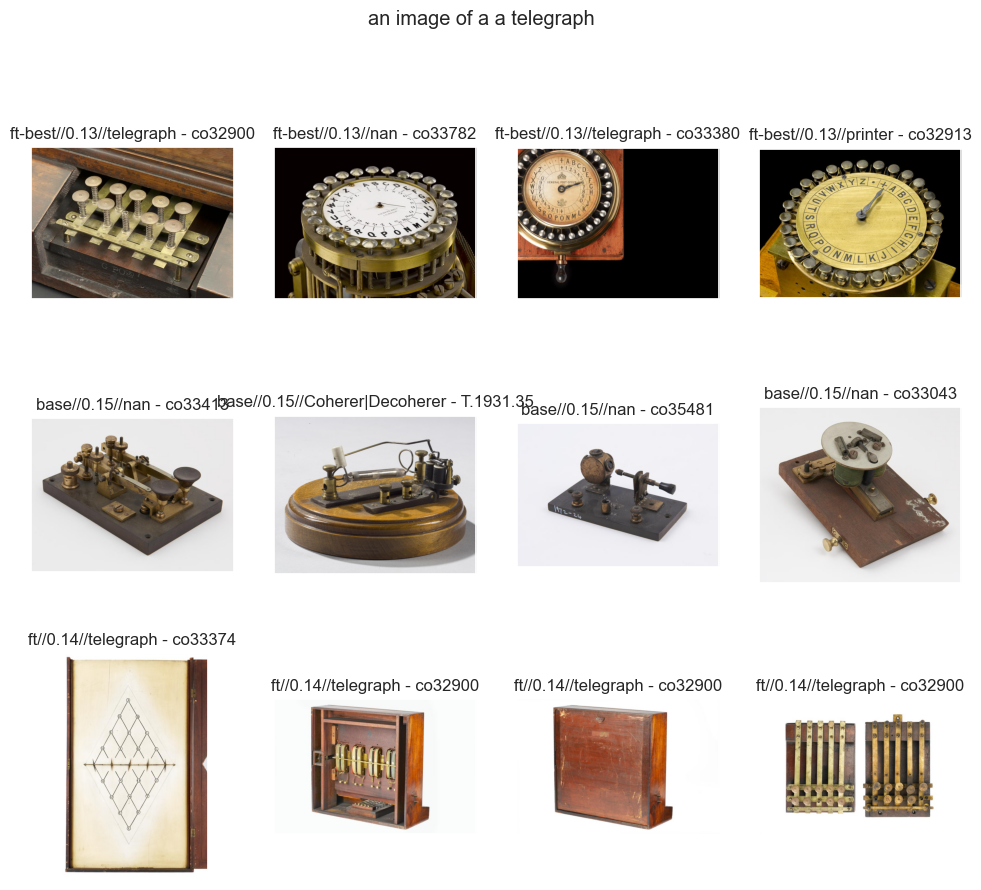

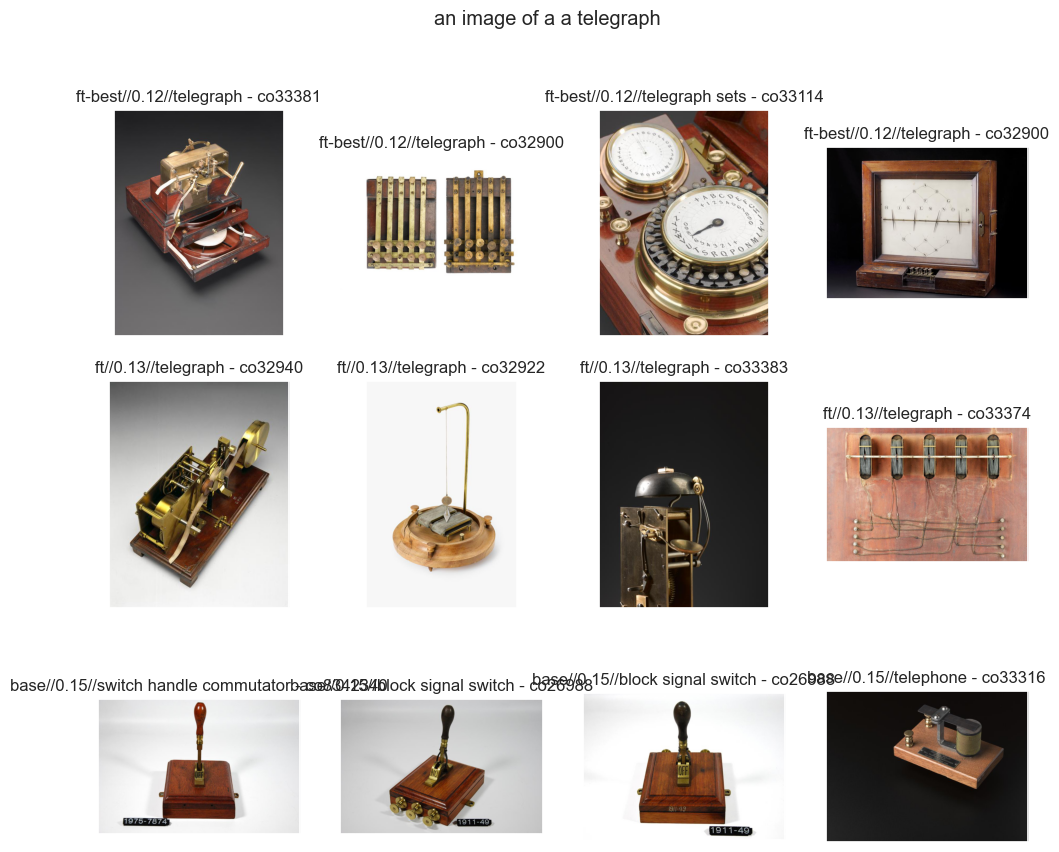

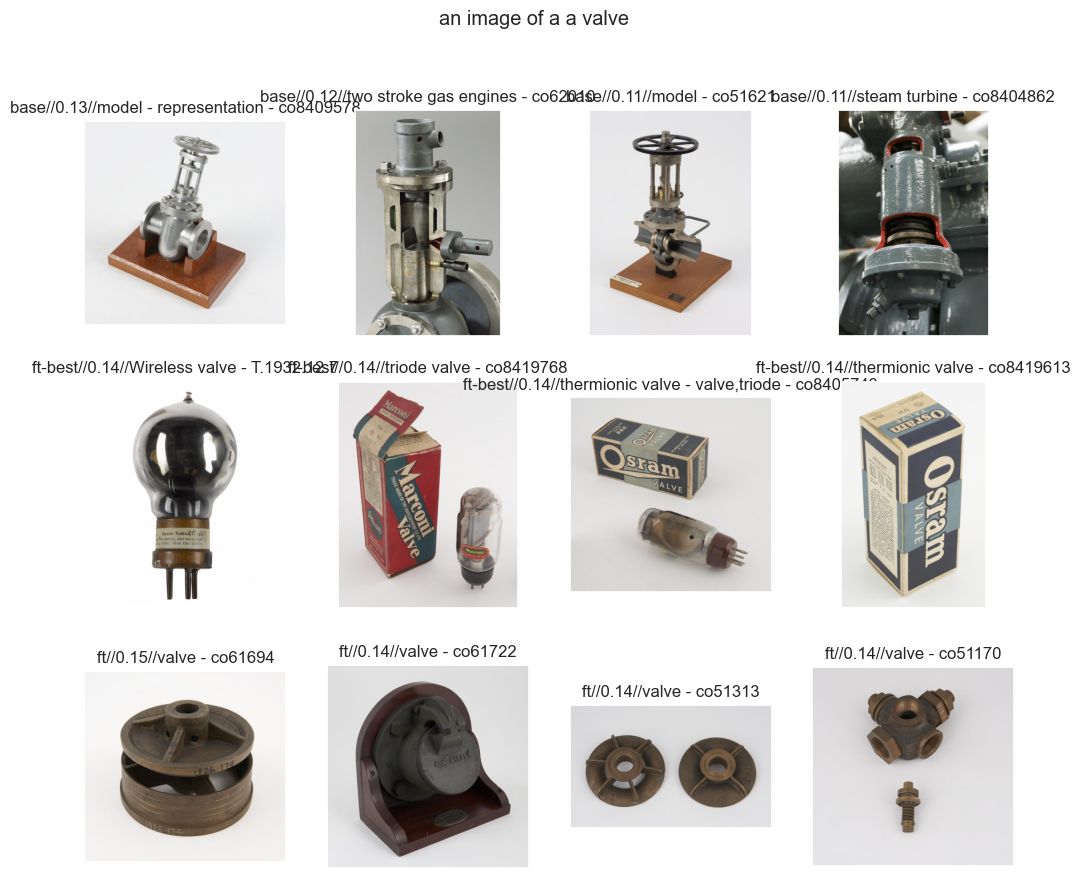

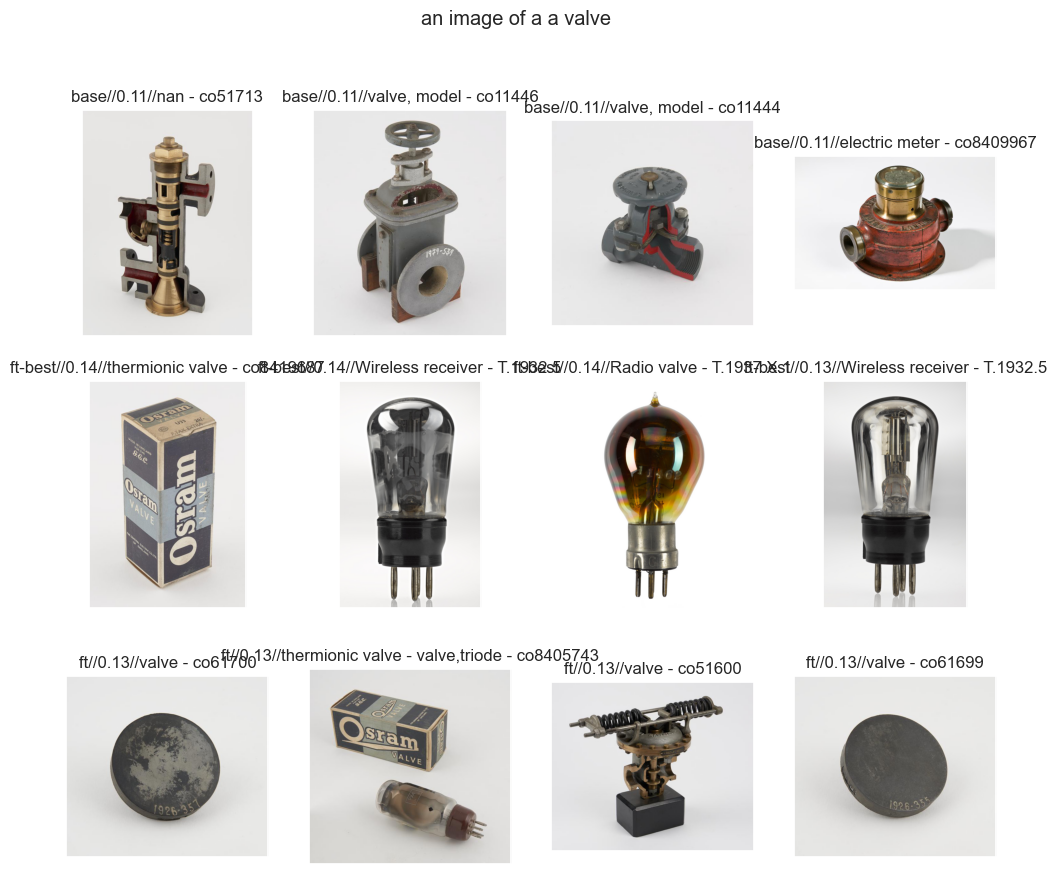

In [35]:
top_n = 4
source = 'img_path'

output_path = Path( 'data/retrieval_annotations')
output_path.mkdir(exist_ok=True)

dfs = []
filters = {'modality':'image'}
experiment_id = 0
for keyword in ['a telephone','a telegraph','a valve','a radio', 'a microphone', 'a coherer', 'a battery','a teleprinter']:
    for start_from in [0, 5, 25]:
        
        result_df, fig = compare_models("an image of a "+keyword, filters, collection_dict, source,top_n,start_from)
        result_df['experiment_id'] = experiment_id
        result_df['experiment_keyword'] = keyword
        result_df['experiment_start_from'] = start_from
        dfs.append(result_df)
        fig.savefig(output_path / f'{keyword}_{experiment_id}.jpg', format='jpg')
        experiment_id+=1


dfs_all = pd.concat(dfs, ignore_index=True)
dfs_all.to_csv( output_path/'retrieval_annotations.csv', index=False)